# Importing data from csv files. 

In [85]:
#Dataset is taken from kaggle thus is divided into 3 files.
train=pd.read_csv(r'train.csv')
test=pd.read_csv(r'test.csv')
gender_submission=pd.read_csv(r'gender_submission.csv')

# Pre-Processing testing dataset.

In [86]:
# gender_submission file consist the output of testing dataset thus mergeing that data with out output data file.
test.insert(1, "Survived", gender_submission['Survived'], True) 
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [87]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
#Taking the columns which are needed for classification and ignoring the columns like PassengerID,Name,Ticket,Fare and Cabin 
train=train[['Survived','Pclass','Sex','SibSp','Parch','Embarked']]
test=test[['Survived','Pclass','Sex','SibSp','Parch','Embarked']]

In [89]:
#Droping the Null value rows and performing one hot encoding
train.dropna()
train=pd.get_dummies(train)
test=pd.get_dummies(test)

# Pre-Processed Dataset. 

In [90]:
train.head()

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,0,1,0,0,1
1,1,1,1,0,1,0,1,0,0
2,1,3,0,0,1,0,0,0,1
3,1,1,1,0,1,0,0,0,1
4,0,3,0,0,0,1,0,0,1


In [91]:
test.head()

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,0,0,1,0,1,0
1,1,3,1,0,1,0,0,0,1
2,0,2,0,0,0,1,0,1,0
3,0,3,0,0,0,1,0,0,1
4,1,3,1,1,1,0,0,0,1


## Making y_train and y_test from train and test DataFrame

In [92]:
y_train=train['Survived']
train.drop(['Survived'], axis=1)

y_test=test['Survived']
test.drop(['Survived'], axis=1)

print(len(y_train))
print(len(y_test))

891
418


# Accuracy Function

In [93]:
def accuracy(y_pred,y_test):
    from sklearn.metrics import accuracy_score,confusion_matrix, f1_score
    import seaborn as sns
    import matplotlib.pyplot as plt
    print("accuracy score:",accuracy_score(y_test, y_pred))
    print("confusion matrix:\n",confusion_matrix(y_test, y_pred))
    print("f1 score:",f1_score(y_test, y_pred, average='macro'))
    # using heatmat to plot accuracy
    a=np.array(y_pred).reshape(-1,1)
    b=np.array(y_test).reshape(-1,1)
    df=pd.DataFrame(np.append(a,b,axis=1))
    df.columns=["predicted_vals","true_vals"]
    cor = df.corr()
    sns.heatmap(cor)
    #to use scatter plot uncomment the below given code
    #plt.scatter(y_test,y_pred)
    plt.show()

# 1) Using RandomForestClassifier from sklearn.ensemble to generate, fit the model and predict the output.

In [94]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')
model.fit(train,y_train)
y_pred_randF= model.predict(test)
y_pred_randF=y_pred_randF.tolist()

# 2) Using Naive Bayes from sklearn.ensemble to generate, fit the model and predict the output.

In [95]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_naiveBayes = gnb.fit(train, y_train).predict(test)

# 3) Using Support Vector Machine from sklearn.ensemble to generate, fit the model and predict the output.

In [96]:
from sklearn import svm
clf = svm.SVC()
clf.fit(train, y_train)
y_pred_SVM=clf.predict(test)

# 4) Using Stochastic Gradient Descent from sklearn.ensemble to generate, fit the model and predict the output.

In [97]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(train, y_train)
SGDClassifier(max_iter=5)
y_pred_SGD=clf.predict(test)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


# 5) Using Stochastic Gradient Descent from sklearn.ensemble to generate, fit the model and predict the output.

In [98]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(train,y_train)
y_pred_KNN=neigh.predict(test)

Random Forest Accuracy
accuracy score: 1.0
confusion matrix:
 [[266   0]
 [  0 152]]
f1 score: 1.0


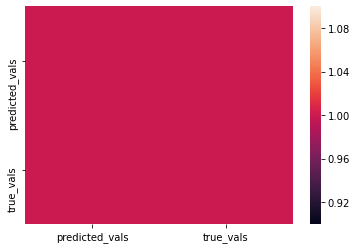


Naive Bayes Accuracy
accuracy score: 1.0
confusion matrix:
 [[266   0]
 [  0 152]]
f1 score: 1.0


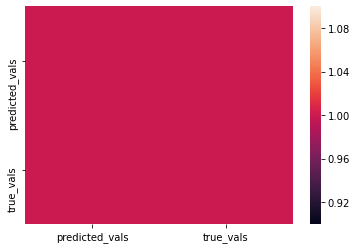


Support Vector Machine Accuracy
accuracy score: 0.9952153110047847
confusion matrix:
 [[266   0]
 [  2 150]]
f1 score: 0.9948160825458243


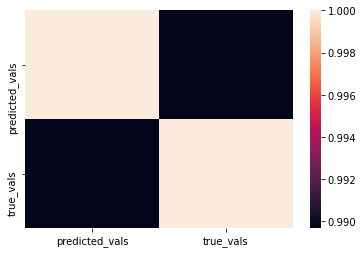


Stochastic Gradient Decent Accuracy
accuracy score: 1.0
confusion matrix:
 [[266   0]
 [  0 152]]
f1 score: 1.0


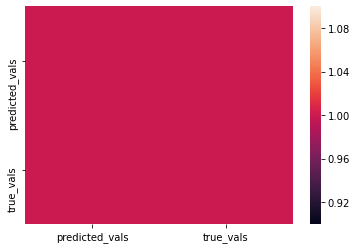


 KNN Accuracy
accuracy score: 0.9880382775119617
confusion matrix:
 [[266   0]
 [  5 147]]
f1 score: 0.986983302504313


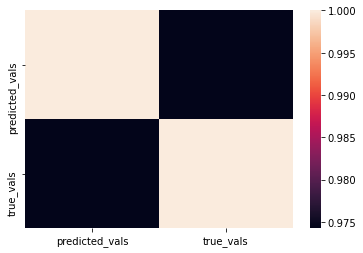

In [99]:
print("Random Forest Accuracy")
accuracy(y_pred_randF,y_test)
print("\nNaive Bayes Accuracy")
accuracy(y_pred_naiveBayes,y_test)
print("\nSupport Vector Machine Accuracy")
accuracy(y_pred_SVM,y_test)
print("\nStochastic Gradient Decent Accuracy")
accuracy(y_pred_SGD,y_test)
print("\n KNN Accuracy")
accuracy(y_pred_KNN,y_test)